In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

In [3]:
with ZipFile("archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet import ResNet101
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetV2L

import random
import os
import warnings
from PIL import Image
warnings.filterwarnings('ignore')


In [16]:
parasitized_images = os.listdir("./cell_images/Parasitized")
unifected_images = os.listdir("./cell_images/Uninfected")




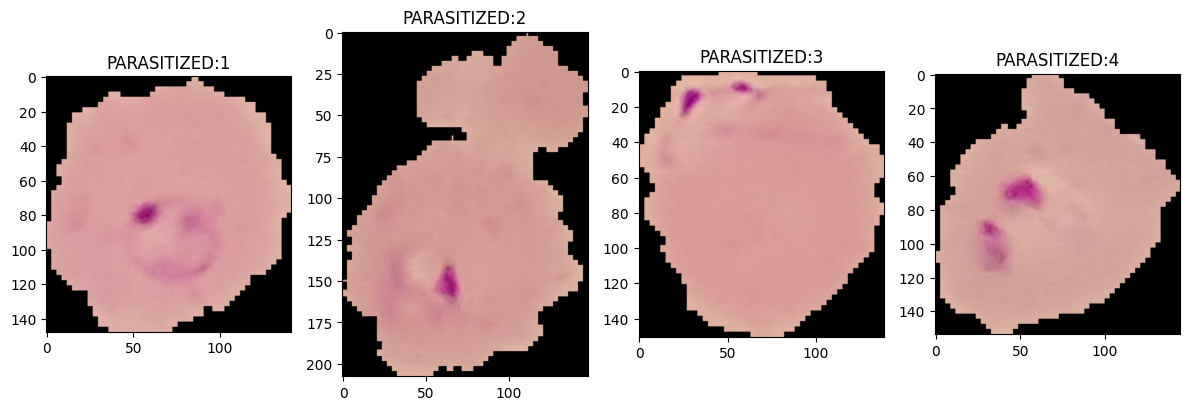

In [ ]:
import cv2
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    img = cv2.imread('./cell_images/Parasitized' + "/" + parasitized_images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(img)
    plt.title(f'PARASITIZED:{i+1}')
    plt.tight_layout()
plt.show()

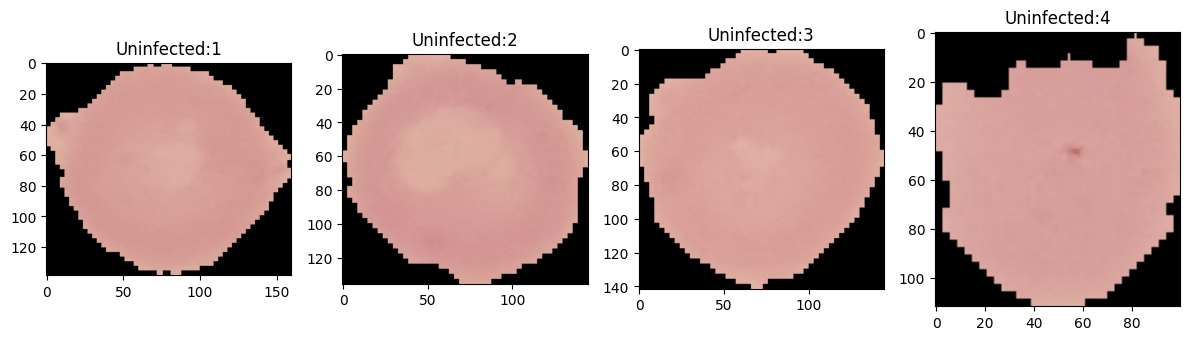

In [24]:
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    img = cv2.imread('./cell_images/Uninfected' + "/" + unifected_images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(img)
    plt.title(f'Uninfected:{i+1}')
    plt.tight_layout()
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


data_dir = "./cell_images"
categories = ['Parasitized', 'Uninfected']


img_size = 128
data = []
labels = []


for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)  

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        try:
            
            img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
            
            
            resized_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append(resized_arr)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image: {img_path}")


data = np.array(data) / 255.0 
labels = np.array(labels)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


Error loading image: ./cell_images\Parasitized\Thumbs.db
Error loading image: ./cell_images\Uninfected\Thumbs.db


In [27]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use a portion of the training data for validation
    epochs=20,
    batch_size=32
)


Epoch 1/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 147s 251ms/step - accuracy: 0.6836 - loss: 0.5651 - val_accuracy: 0.9370 - val_loss: 0.1977
Epoch 2/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 137s 248ms/step - accuracy: 0.9450 - loss: 0.1707 - val_accuracy: 0.9535 - val_loss: 0.1423
Epoch 3/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 133s 241ms/step - accuracy: 0.9560 - loss: 0.1299 - val_accuracy: 0.9601 - val_loss: 0.1264
Epoch 4/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 131s 236ms/step - accuracy: 0.9609 - loss: 0.1137 - val_accuracy: 0.9603 - val_loss: 0.1218
Epoch 5/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 132s 239ms/step - accuracy: 0.9689 - loss: 0.0878 - val_accuracy: 0.9531 - val_loss: 0.1361
Epoch 6/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 131s 237ms/step - accuracy: 0.9730 - loss: 0.0771 - val_accuracy: 0.9528 - val_loss: 0.1636
Epoch 7/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 121s 218ms/step - accuracy: 0.9801 - loss: 0.0561 - val_accuracy: 0.9567 - val_loss: 0.1615
Epoch 8/20
552/552 ━━━━━━━━━━━━━━━━━━━━ 122s 220ms/step - accuracy: 0.9881 -

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.9519 - loss: 0.5100
Test Accuracy: 0.9501088261604309


In [ ]:
from sklearn.metrics import classification_report, f1_score

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=categories)
print(report)


f1 = f1_score(y_test, y_pred_classes)
print(f"F1-Score: {f1}")


173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step
              precision    recall  f1-score   support

 Parasitized       0.97      0.93      0.95      2797
  Uninfected       0.93      0.97      0.95      2715

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512

F1-Score: 0.9502442554731318


Confusion Matrix:
[[2611  186]
 [  89 2626]]


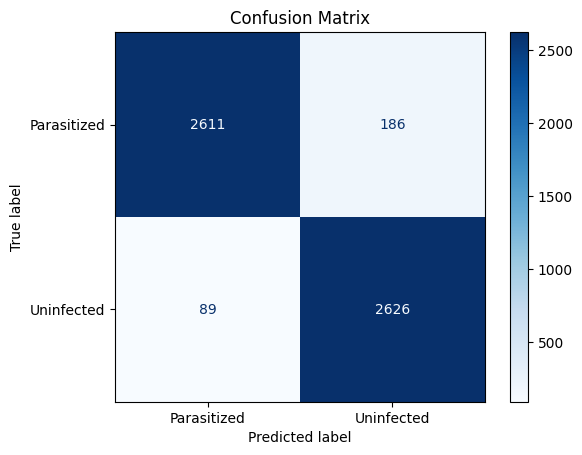

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
  
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show() 


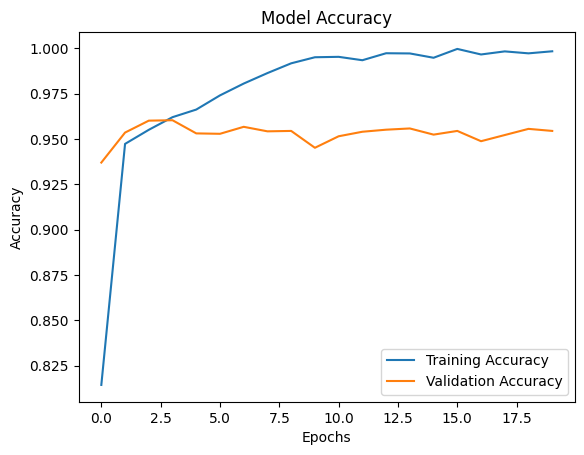

In [33]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

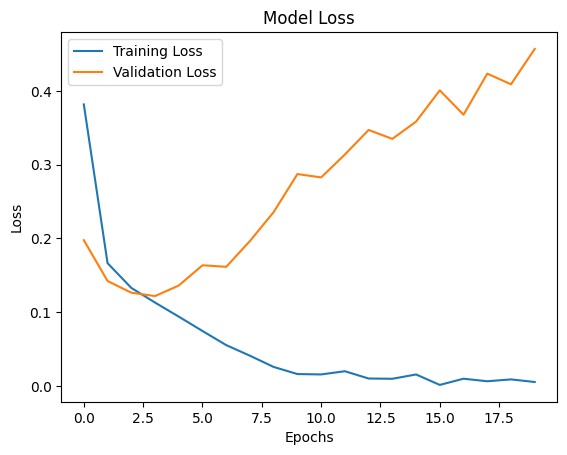

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
model.save("malaria_cnn_model.h5")